### Conditional Graph

#### Objectives:
1. Implement the ***condition logic*** to route the flow of data to different nodes.
2. Use **START** and **END** nodes from `langgraph.graph` to manage entry and exit points explicitly.
3. Design multiple nodes to perform different operations (addition, substraction).
4. Create a ***Router*** node to handle the decision making and control graph flow.

***Main Goal:*** How to use add `add_conditional_edges()` method. 

In [1]:
from typing import List, TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    """State of the agent."""
    num1 : int
    num2 : int
    operator : str
    result : int

In [3]:
def addition(state: AgentState) -> AgentState:
    """Perform addition."""
    state['result'] = state['num1'] + state['num2']
    return state

def subtraction(state: AgentState) -> AgentState:
    """Perform subtraction."""
    if state['num1'] < state['num2']:
        state['result'] = state['num2'] - state['num1']
    else:
        state['result'] = state['num1'] - state['num2']
    return state

def decide_next_node(state: AgentState) -> str:
    """This node will select the next node based on the operator."""
    if state['operator'] == "+":
        return "addition_operation"
    elif state['operator'] == "-":
        return "subtraction_operation"
    else:
        raise ValueError(f"Unknown operator: {state['operator']}")

In [4]:
graph = StateGraph(AgentState)

graph.add_node("addition", addition)
graph.add_node("subtraction", subtraction)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges("router", decide_next_node,
                            {
                              "addition_operation": "addition",
                              "subtraction_operation": "subtraction"
                          })

graph.add_edge("addition", END)
graph.add_edge("subtraction", END)

app = graph.compile()

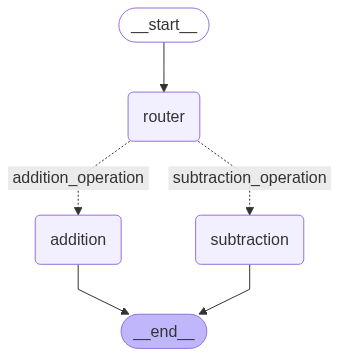

In [5]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({
    'num1': 1,
    'num2': 5,
    'operator': '-'
})

In [7]:
result['result']

4